In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

city_data_path = "city_data.csv"
ride_data_path = "ride_data.csv"


city_data_path = pd.read_csv(city_data_path)
city_data_path.head(5)



,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [2]:
ride_data_path = pd.read_csv(ride_data_path)

In [3]:
#Merge for create pie chart
Pi_chart_merge = pd.merge(ride_data_path, city_data_path, on ="city")
Pi_chart_merge.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [19]:
GroupbyUrban_Totalfair=Pi_chart_merge.groupby(["type"]).sum()
GroupbyUrban_Totalfair.index.name="type"
GroupbyUrban_Totalfair.reset_index(level=0, inplace=True)
GroupbyUrban_Totalfair = GroupbyUrban_Totalfair.rename(columns={"fare":"Total fare","driver_count":"Numbers of Drivers"})
GroupbyUrban_Totalfair=GroupbyUrban_Totalfair.iloc[:,[0,1,3]]
GroupbyUrban_Totalfair.head()



,type,Total fare,Numbers of Drivers
0,Rural,4255.09,727
1,Suburban,20335.69,9730
2,Urban,40078.34,64501


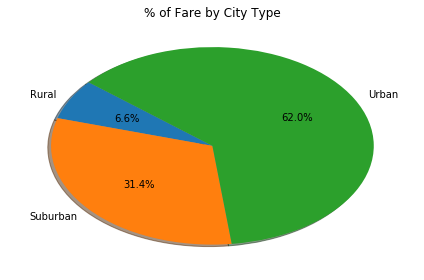

In [55]:
plt.pie(
    # using data total)arrests
     GroupbyUrban_Totalfair['Total fare'],
    # with the labels being officer names
    labels=GroupbyUrban_Totalfair['type'],autopct="%1.1f%%", shadow=True, startangle=140)
  
plt.title("% of Fare by City Type")

# View the plot
plt.tight_layout()
plt.savefig("% of Fare by City Type.png")
plt.show()



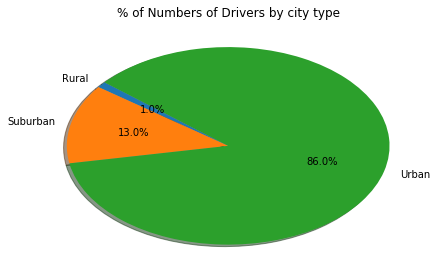

In [56]:
plt.pie(
    # using data total)arrests
     GroupbyUrban_Totalfair['Numbers of Drivers'],
    # with the labels being officer names
    labels=GroupbyUrban_Totalfair['type'],autopct="%1.1f%%", shadow=True, startangle=140)
  

plt.title("% of Numbers of Drivers by city type")
# View the plot
plt.tight_layout()
plt.savefig("% of Numbers of Drivers by city type.png")
plt.show()

In [57]:
#count how many rides in the table. 
Total_Rides_per_city=Pi_chart_merge.groupby(["type"]).count()
Total_Rides_per_city.head()
Total_Rides_per_city.index.name="type"
Total_Rides_per_city.reset_index(level=0, inplace=True)

Total_Rides_per_city = Total_Rides_per_city.rename(columns={"ride_id":"Numbers of rides"})
Total_Rides_per_city=Total_Rides_per_city.iloc[:,[0,4]]
Total_Rides_per_city.head()

,type,Numbers of rides
0,Rural,125
1,Suburban,657
2,Urban,1625


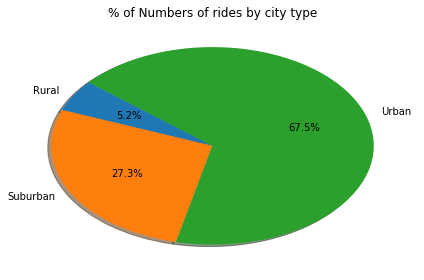

In [58]:
plt.pie(
    # using data total)arrests
     Total_Rides_per_city['Numbers of rides'],
    # with the labels being officer names
    labels=Total_Rides_per_city['type'],autopct="%1.1f%%", shadow=True, startangle=140)
  
plt.title("% of Numbers of rides by city type")

plt.tight_layout()
plt.savefig("% of Numbers of rides by city type.png")
plt.show()

In [34]:
# get two coloumns
average_fair_percity=ride_data_path.iloc[:,[0,2]]
average_fair_percity.head(5)

,city,fare
0,Sarabury,38.35
1,South Roy,17.49
2,Wiseborough,44.18
3,Spencertown,6.87
4,Nguyenbury,6.28


In [7]:
#count total numbers ride by city
Total_Number_city =average_fair_percity["city"].value_counts()

Total_Number_city.head(5)

Swansonbury      34
Port Johnstad    34
South Louis      32
Port James       32
Jacobfort        31
Name: city, dtype: int64

In [8]:
The_total_of_rides_city = pd.DataFrame({"Total rides per city":Total_Number_city})
The_total_of_rides_city.index.name="city"
The_total_of_rides_city.reset_index(level=0, inplace=True)
The_total_of_rides_city.head()

,city,Total rides per city
0,Swansonbury,34
1,Port Johnstad,34
2,South Louis,32
3,Port James,32
4,Jacobfort,31


In [9]:
#Group by city and take average
Groupbycity_fair=average_fair_percity.groupby(["city"]).mean()
Groupbycity_fair.head()
Groupbycity_fair.reset_index(level=0, inplace=True)
Groupbycity_fair.head(5)

,city,fare
0,Alvarezhaven,23.928710
1,Alyssaberg,20.609615
2,Anitamouth,37.315556
3,Antoniomouth,23.625000
4,Aprilchester,21.981579


In [10]:
#Merge with city to get driver count, type and average fair together
merge_table = pd.merge(city_data_path, Groupbycity_fair, on ="city")
merge_table.head(5)

,city,driver_count,type,fare
0,Kelseyland,63,Urban,21.806429
1,Nguyenbury,8,Urban,25.899615
2,East Douglas,12,Urban,26.169091
3,West Dawnfurt,34,Urban,22.330345
4,Rodriguezburgh,52,Urban,21.332609


In [11]:
# create final  table for chart
Bubble_chart_table = pd.merge(merge_table, The_total_of_rides_city, on ="city")
Bubble_chart_table.head()

,city,driver_count,type,fare,Total rides per city
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [12]:
renamed_Bubble_chart_table = Bubble_chart_table.rename(columns={"driver_count":"Numbers of Drivers", "fare":"Average Fare Per City"})
renamed_Bubble_chart_table.head()

,city,Numbers of Drivers,type,Average Fare Per City,Total rides per city
0,Kelseyland,63,Urban,21.806429,28
1,Nguyenbury,8,Urban,25.899615,26
2,East Douglas,12,Urban,26.169091,22
3,West Dawnfurt,34,Urban,22.330345,29
4,Rodriguezburgh,52,Urban,21.332609,23


In [13]:
# The maximum x value for our chart will be 100
#plt.title("Pyber Ride Sharing Data")
#plt.xlabel("Total Numbers of rideper city)")
#plt.ylabel("Average Fair($)")

#renamed_Bubble_chart_table.plot(kind="scatter", x="Total rides per city", y="Average Fare Per City",c="Numbers of Drivers", grid=True, figsize=(20,10),
              #title="Pyber ridering sharing data")
#plt.show()

#plt.scatter(df.preTestScore, df.postTestScore, s=300, c=df.female)

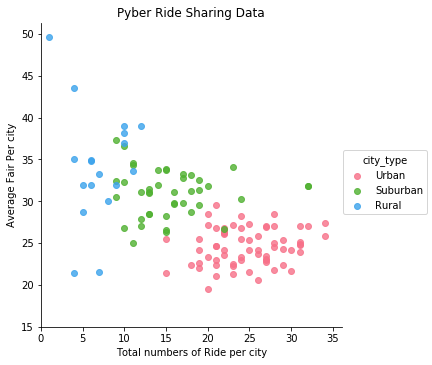

In [62]:
import seaborn as sns


# create data
x = renamed_Bubble_chart_table["Total rides per city"]
y = renamed_Bubble_chart_table["Average Fare Per City"]
z =renamed_Bubble_chart_table["Numbers of Drivers"]
city_type=renamed_Bubble_chart_table["type"]
df = pd.DataFrame({'x':x, 'y':y, 'z':z,"city_type":city_type})


# Plot with palette
sns.lmplot( x='x', y='y', data=df, fit_reg= False, hue="city_type", legend="city_type", palette="husl")

 
plt.xlabel("Total numbers of Ride per city")
plt.ylabel("Average Fair Per city")
plt.title("Pyber Ride Sharing Data")
plt.ylim(15, None)
plt.xlim(0, None)



plt.savefig("Pyber Ride Sharing Data.png")
plt.show()